<a href="https://colab.research.google.com/github/sergiomora03/AdvancedTopicsAnalytics/blob/main/exercises%20/E8-OpenAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Usando ChatGPT
## Objetivos

El propósito de este taller es que usted interactúe con quizás el LLMs (large language model) más popular en la actualidad: ChatGPT. Para eso vamos a hacer uso del API de OpenAI.


Agradecimientos especiales para [Rubén Manrique](https://github.com/Ruframapi) autor.


## Parte 1. Creación de cuenta

Ingrese a https://openai.com/ en el botón Sign UP, diligencie el formulario y realice la verificación de su email.

Una vez verificado su email, ud debe proporcionar un número de teléfono móvil al cual le llegará un codigo de verificación. Si todo sale bien deberá poder ingresar a una interfaz, donde encontrará en la parte superior derecha una imagen similar a la que se muestra:

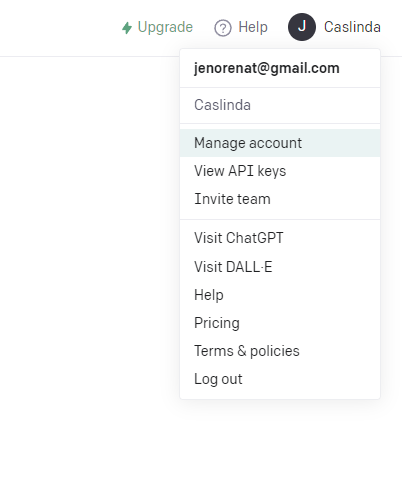

Diríjase a la sección ***Manage Account***. Deberá poder ver los 5 USD de créditos gratuitos que le dieron a su cuenta.

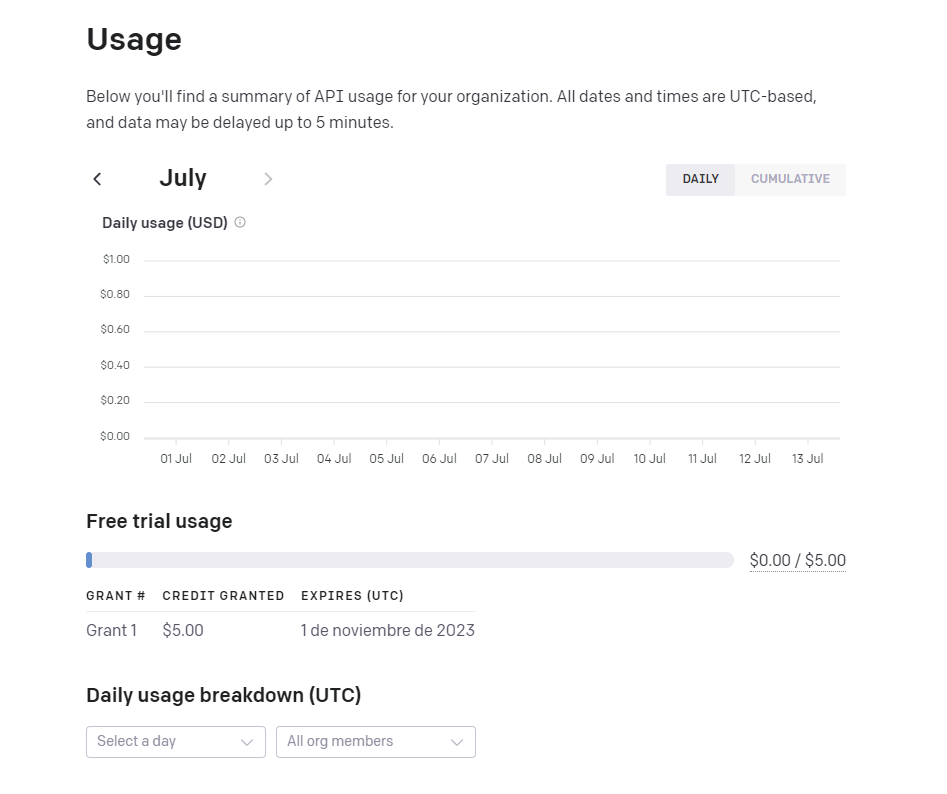

Vamos a crear una API key para poder hacer uso de los servicio de openAI. Diríjase a ***View API keys***

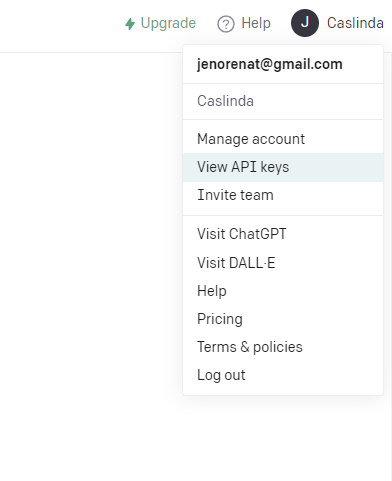

Cree una nueva llave con el nombre que desee. **Nota importante:** Inmediatamente a la creación le va a ser mostrada la llave por una única vez, por favor copiela y guardela en un lugar seguro.

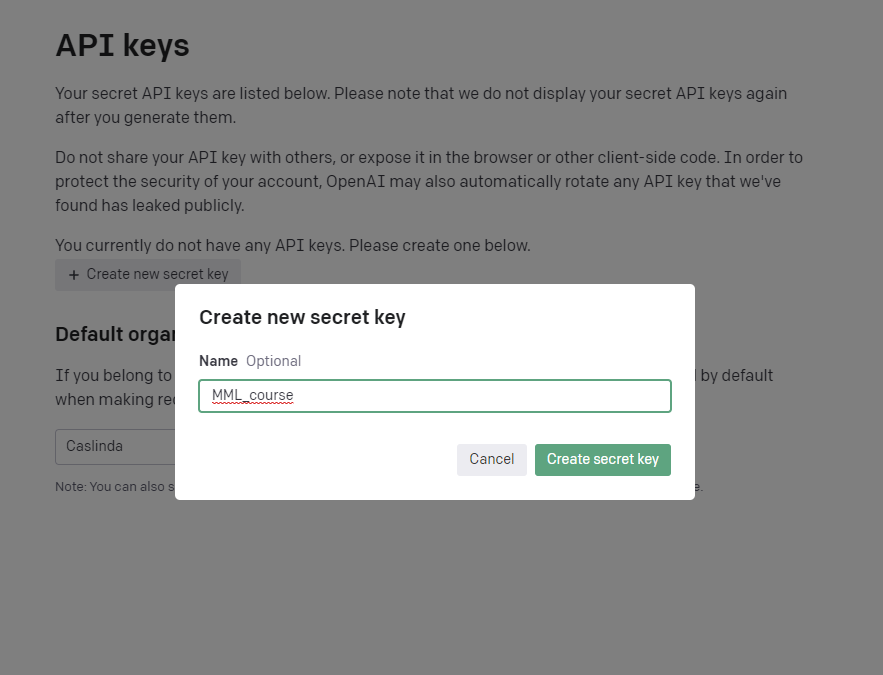

## Parte 2. Interacción básica

In [ ]:
!pip install openai
!pip install python-dotenv


Ahora, copie su API key en la variable `openai.api_key` y entre comillas:

In [ ]:
import openai
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())

openai.api_key  = ""

A lo largo de este notebook, utilizaremos el modelo gpt-3.5-turbo de OpenAI y el endpoint de chatcompletion.

Esta función auxiliar facilitará el uso de indicaciones y la visualización de las salidas generadas:

In [ ]:
def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message["content"]

### Prompting

Prompting es la forma en que los seres humanos pueden comunicarse con las inteligencias artificiales. Es una manera de decirle a la IA qué queremos y cómo lo queremos, generalmente utilizando palabras. La ingeniería de prompts es la tarea de encontrar la indicación (texto de entrada) que obtiene los mejores resultados de la IA.


## Estrategias básicas para Prompting
- Escribir instrucciones claras
- Use delimitadores para indicar claramente las distintas partes de la entrada. Los delimitadores pueden ser: ```, """, < >, `<tag> </tag>`, `:`


In [ ]:
##Consideremos el ejercicio de resumir un texto de entrada

text = f"""
El aprendizaje automático (AA) o aprendizaje automatizado o aprendizaje \
de máquinas o aprendizaje computacional (del inglés, machine learning) \
es el subcampo de las ciencias de la computación y una rama de la inteligencia artificial, \
cuyo objetivo es desarrollar técnicas que permitan que las computadoras aprendan. \
Se dice que un agente aprende cuando su desempeño mejora con la experiencia y mediante el uso de datos; \
es decir, cuando la habilidad no estaba presente en su genotipo o rasgos de nacimiento. \
En el aprendizaje de máquinas un computador observa datos,  \
construye un modelo basado en esos datos y utiliza ese modelo a la vez como \
una hipótesis acerca del mundo y una pieza de software que puede resolver problemas. \
"""
prompt = f"""
Resume el texto delimitado por triple backticks en una sola oración.
```{text}```
"""
response = get_completion(prompt)
print(response)

Los prompts pueden ser tan sofisticados como uno quiera; sin embargo, entre más sofisiticados, se deben escribir con mayor claridad. Una buena estrategia para construir prompts de calidad en tareas complejas es descomponer la tarea en tareas más pequeñas y ordenadas. Veamos un ejemplo:

In [ ]:
text = f"""
A lo largo del día, y luego de conocerse el fallo donde la Corte Internacional de Justicia (CIJ) rechazó la petición de Nicaragua de extender su plataforma continental más allá de 200 millas náuticas desde su costa, reaccionaron todos los expresidentes vivos de Colombia.\
Nicaragua no tiene derecho a una línea extendida dentro de las 200 millas de la línea base de Colombia. Dentro de la línea base de las millas náuticas de San Andrés y Providencia, Nicaragua no tiene derechos a una plataforma extendida, leyó Joan Donoghue, presidenta de la Corte de La Haya.\
Es de recordar que Colombia y Nicaragua son viejos conocidos en la disputa por el mar. En total, a la Corte Internacional de Justicia (CIJ) han llegado tres demandas y en dos de esas Colombia no salió tan bien librado, pues ya ha perdido parte de sus aguas con el país centroamericano. Eso sí, hay que resaltar que sigue con la plena jurisdicción de las islas de San Andrés y Providencia.\
Iván Duque: Colombia ha defendido su soberanía a pesar de haberse retirado de la competencia de la CIJ, luego de su injusto fallo de 2012. Quiero felicitar a Manuel José Cepeda, Carlos Gustavo Arrieta, al equipo de la Cancillería y la Armada Nacional; al igual que a los asesores del equipo de Defensa, que desvirtuaron los argumentos de Nicaragua en su absurda pretensión de Plataforma Continental Extendida.\
Juan Manuel Santos: Gran triunfo de Colombia. Felicitaciones a la Canciller Holguín y a todos los que hicieron posible este gran logro diplomático jurídico en La Haya para nuestro país. Se cierra un capítulo luego de 10 años de litigio que sumados a los otros once del primer proceso de Nicaragua contra Colombia por la soberanía territorial y delimitación marítima, concluyen más de dos décadas de pleitos judiciales entre los dos países.\
"""

prompt = f"""
Realice las siguientes acciones:
1 - Resume el siguiente texto delimitado por triple backticks en 1 oración.
2 - Traducir el resumen al francés.
3 - Enumere cada nombres de organziaciones o paises presentes en el resumen en francés.
4 - Muestra un objeto json que contiene lo siguiente \
keys: french_summary, num_names.

Text:
```{text}```
"""
response = get_completion(prompt)
print(response)


### Numeral A

Escriba un prompt que realice las siguientes operaciones sobre un texto en inglés de máximo un párrafo:
- Lo traduzca a español con tono informal.
- Identifique y liste los verbos en el texto traducido.
- Devuelva un objeto Json con la traducción y la lista de verbos.

In [ ]:
### Usar esta celda para entregar numeral A

## Few Shot Learning

Vamos a construir un clasificador por medio de un modelo de lenguaje. Para eso vamos a darle un pequeño conjunto de ejemplos en el prompt. A esta estrategia se le conoce como "few shot".

In [ ]:
## Hagamos un extractor de entidades nombradas, le damos unos pocos ejemplos y la oración de interes al final
prompt = f"""
[Texto]: Fred es un emprendedor en serie. Cofundador y director ejecutivo de Platform.sh, anteriormente cofundó Commerce Guys, un proveedor líder de comercio electrónico de Drupal. Su misión es garantizar que mientras continuamos en un viaje ambicioso para transformar profundamente la forma en que se usa y se percibe la computación en la nube, mantenemos los pies bien puestos en el suelo y continuamos con el rápido crecimiento que hemos disfrutado hasta ahora.
[Nombre]: Fred
[Puesto]: Co-fundador y CEO
[Empresa]: Platform.sh
###
[Texto]: Microsoft (la palabra es un acrónimo de "software de microcomputadora") fue fundado por Bill Gates el 4 de abril de 1975 para desarrollar y vender intérpretes BASIC para Altair 8800. Steve Ballmer reemplazó a Gates como director ejecutivo en 2000 y luego imaginó una estrategia de "dispositivos y servicios".
[Nombre]: Steve Ballmer
[Puesto]: director general
[Empresa]: Microsoft
###
[Texto]: Franck Riboud nació el 7 de noviembre de 1955 en Lyon. Es hijo de Antoine Riboud, el anterior director ejecutivo, que transformó al antiguo fabricante de vidrio europeo BSN Group en un actor líder en la industria alimentaria. Es el director general de Danone.
[Nombre]: Franck Riboud
[Puesto]: director general
[Empresa]: Danone
###
[Texto]: David Melvin es un profesional de servicios financieros y de inversión en CITIC CLSA con más de 30 años de experiencia en banca de inversión y capital privado. Actualmente es Consejero Senior de CITIC CLSA
"""
response = get_completion(prompt)
print(response)
## Nota: Cobran por el tamaño del prompt, realizar un few-shot learning podría no ser adecuado para tareas complejas.

### Numeral B

Diseñe un prompt que permita generar tweets (máximo 150 caracteres) en base a tres palabras del usuario: empresa, un día de la semana, y un producto. Recuerde utilizar la metodología "Few Shot Learning" mencionada anteriormente. Ejemplo:

Tesla
Lunes
Carro Model S

-> Este Lunes Tesla abrió con las acciones en alza gracias al lanzamiento del nuevo Model S

In [ ]:
### Usar esta celda para entregar numeral B

## Zero shot learning

Este modelo de lengauge es tan poderoso que para algunas tareas no es necesario especificarle ejemplos, a esto se le llama "Zero shot" y es de hecho la razón por la cual se cree que estos LLMs tienen un entendimiento parcial del mundo, Veamos unos ejemplos.

In [ ]:
review = """
Compré esto para la observación de aves y es un binocular muy bueno.
No pesa, es fácil de enfocar y es útil para caminar por el parque o por el bosque.
También proporciona un archivo adjunto para el teléfono, por lo que la fotografía de aves se ha convertido en mi nuevo pasatiempo.
"""

prompt = f"""
¿Cuál es el sentimiento de la siguiente revisión del producto,
que se delimita con triple backticks?

Review text: '''{review}'''
"""

response = get_completion(prompt)
print(response)


### Numeral C

Los zero shot tienen limitaciones. Proponga un review que confunda al modelo de lenguaje y lo haga generar una salida errónea.

In [ ]:
### Usar esta celda para entregar numeral C

### Numeral D

Propongan un few shot prompting que permita identificar **las** siguientes emociones: furia/ira, alegría, tristeza, y sorpresa.

In [ ]:
### Usar esta celda para entregar numeral D

## Cambios de tonalidad en el texto

Con un LLMs podemos cambiar el tono del texto sin perder la semantica original del mismo.

In [ ]:
prompt = f"""
Reescribir el siguiente texto a un lenguaje formal de negocios:
'Como vamos parcero, te escribo para ver si te llego los respuestos del cacharro ese que te vendieron. Yo te los puedo conseguir por menos lucas con un pana de mi papa'
"""
response = get_completion(prompt)
print(response)

Los modelos de lenguaje también son fenomenales para traducción.



In [ ]:
prompt = f"""
Reescribir el siguiente texto a un lenguaje formal de negocios, en inglés y japones:
'Como vamos parcero, te escribo para ver si te llego los respuestos del cacharro ese que te vendieron. Yo te los puedo conseguir por menos lucas con un pana de mi papa'
"""
response = get_completion(prompt)
print(response)

### Numeral E

Escriban en un párrafo qué fue lo que más les gustó del curso de verano y cuáles aspectos negativos encontró. Justifíquen sus opiniones. Ahora, solicite al modelo de lenguaje que lo reescriba en lenguaje formal, informal, regional (paisa, caleño, costeño, etc) y en diferentes lenguajes. Deje ejecutado en el notebook la salida que más le haya gustado.

In [ ]:
### Usar esta celda para entregar numeral E